In [ ]:
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.4 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=514bf6e0434c69a2dbc29660e59a3e72391770599c08366d68d45a742b957792
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.5 MB/s eta 0:00:00


In [ ]:
import scanpy as sc
import celltypist
from celltypist import models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = sc.read_h5ad('/content/drive/MyDrive/train_set.h5ad')
test = sc.read_h5ad('/content/drive/MyDrive/test_set.h5ad')

In [ ]:
sc.pp.normalize_total(train, target_sum=1e4)
sc.pp.log1p(train)

sc.pp.normalize_total(test, target_sum=1e4)
sc.pp.log1p(test)

In [ ]:
train.obs

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes
cell,,,,,,
C18.MAA000944.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000944,5071
P6.MAA000926.3_9_M.1.1,endothelial cell,Cortex,M,3_9_M,MAA000926,2506
F21.MAA000561.3_10_M.1.1,endothelial cell,Cortex,M,3_10_M,MAA000561,4605
A3.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932,2216
I12.MAA000581.3_10_M.1.1,brain pericyte,Cerebellum,M,3_10_M,MAA000581,3752
...,...,...,...,...,...,...
E6.MAA000935.3_8_M.1.1,oligodendrocyte,Hippocampus,M,3_8_M,MAA000935,5182
K4.MAA000563.3_10_M.1.1,oligodendrocyte precursor cell,Hippocampus,M,3_10_M,MAA000563,3790
K2.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932,2107


In [ ]:
new_model = celltypist.train(train, labels = 'cell_ontology_class', n_jobs = 10, feature_selection = True)

In [ ]:
new_model.write('./model_from_train.pkl')

In [ ]:
new_model = models.Model.load('./model_from_train.pkl')

In [ ]:
predictions = celltypist.annotate(test, model = './model_from_train.pkl', majority_voting = True)

In [ ]:
predictions.predicted_labels

,predicted_labels,over_clustering,majority_voting
cell,,,
B18.MAA000942.3_8_M.1.1,oligodendrocyte,29,oligodendrocyte
C2.MAA000932.3_11_M.1.1,brain pericyte,2,brain pericyte
F7.MAA000638.3_9_M.1.1,endothelial cell,9,endothelial cell
A9.MAA001845.3_39_F.1.1,endothelial cell,13,endothelial cell
C1.MAA000578.3_10_M.1.1,Bergmann glial cell,37,Bergmann glial cell
...,...,...,...
P21.MAA000926.3_9_M.1.1,endothelial cell,1,endothelial cell
E19.MAA000538.3_8_M.1.1,Bergmann glial cell,37,Bergmann glial cell
A13.MAA000560.3_10_M.1.1,astrocyte,3,astrocyte


In [ ]:
adata = predictions.to_adata()

In [ ]:
adata

AnnData object with n_obs × n_vars = 681 × 19001
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'ERCC', 'mt', 'ribo', 'hb', 'n_counts'
    uns: 'log1p', 'neighbors', 'over_clustering', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
sc.tl.umap(test)

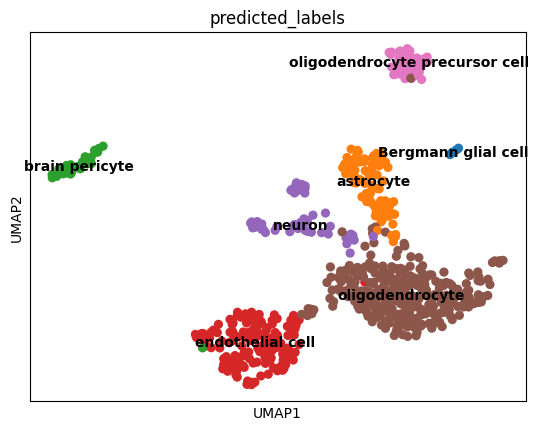

In [ ]:
sc.pl.umap(test, color = [ 'predicted_labels'], legend_loc = 'on data')

In [ ]:
model = models.Model.load(model = './model_from_train.pkl')
model.cell_types

array(['Bergmann glial cell', 'astrocyte', 'brain pericyte',
       'endothelial cell', 'neuron', 'oligodendrocyte',
       'oligodendrocyte precursor cell'], dtype=object)

In [ ]:
top_3_genes = model.extract_top_markers("Bergmann glial cell", 3)
top_3_genes

array(['Dao', 'Rasl10b', 'Pcp2'], dtype=object)

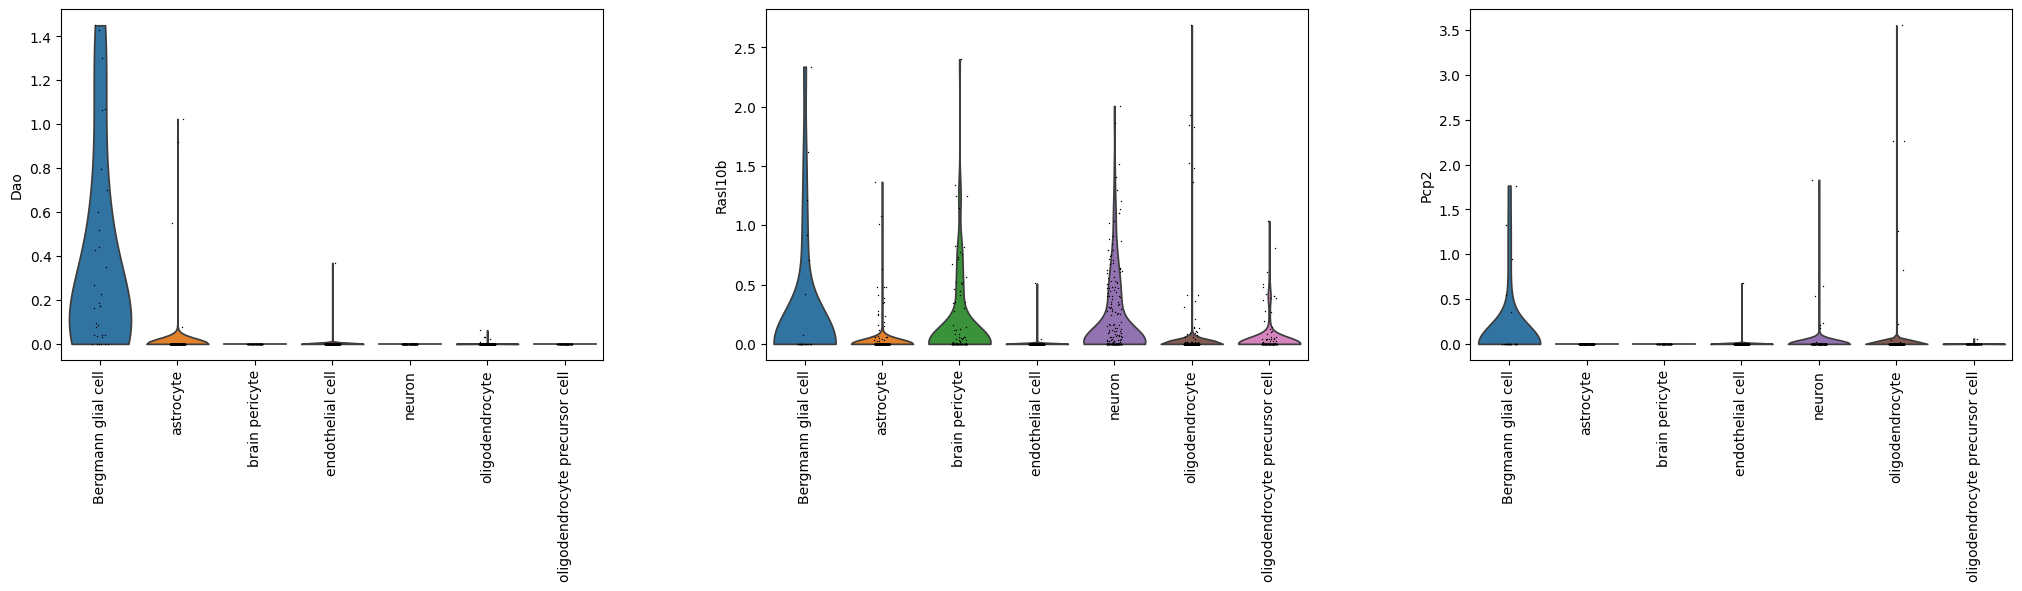

In [ ]:
sc.pl.violin(train, top_3_genes, groupby = 'cell_ontology_class', rotation = 90)

In [ ]:
predictions.predicted_labels.predicted_labels

,predicted_labels
cell,
B18.MAA000942.3_8_M.1.1,oligodendrocyte
C2.MAA000932.3_11_M.1.1,brain pericyte
F7.MAA000638.3_9_M.1.1,endothelial cell
A9.MAA001845.3_39_F.1.1,endothelial cell
C1.MAA000578.3_10_M.1.1,Bergmann glial cell
...,...
P21.MAA000926.3_9_M.1.1,endothelial cell
E19.MAA000538.3_8_M.1.1,Bergmann glial cell
A13.MAA000560.3_10_M.1.1,astrocyte


In [ ]:
from sklearn.metrics import classification_report, hamming_loss

#Extract true and predicted labels
true_labels = test.obs['cell_ontology_class']  #  ground truth column
predicted_labels = predictions.predicted_labels.predicted_labels  # R
###########
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))



Classification Report:
                                precision    recall  f1-score   support

           Bergmann glial cell       1.00      0.75      0.86         8
                     astrocyte       0.95      0.97      0.96        87
                brain pericyte       1.00      1.00      1.00        31
              endothelial cell       1.00      0.99      1.00       143
                        neuron       0.96      0.95      0.95        56
               oligodendrocyte       0.99      0.98      0.99       315
oligodendrocyte precursor cell       0.89      0.98      0.93        41

                      accuracy                           0.98       681
                     macro avg       0.97      0.94      0.95       681
                  weighted avg       0.98      0.98      0.98       681



In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

########
true_labels = test.obs['cell_ontology_class']  # truth column
predicted_labels = predictions.predicted_labels.predicted_labels  #


true_labels_list = true_labels.tolist()
predicted_labels_list = predicted_labels.tolist()
accuracy = accuracy_score(true_labels_list, predicted_labels_list)
f1 = f1_score(true_labels_list, predicted_labels_list, average='weighted')
print("Classification Report:")
print(classification_report(true_labels_list, predicted_labels_list))
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (Weighted): {f1:.2f}")


Classification Report:
                                precision    recall  f1-score   support

           Bergmann glial cell       1.00      0.75      0.86         8
                     astrocyte       0.95      0.97      0.96        87
                brain pericyte       1.00      1.00      1.00        31
              endothelial cell       1.00      0.99      1.00       143
                        neuron       0.96      0.95      0.95        56
               oligodendrocyte       0.99      0.98      0.99       315
oligodendrocyte precursor cell       0.89      0.98      0.93        41

                      accuracy                           0.98       681
                     macro avg       0.97      0.94      0.95       681
                  weighted avg       0.98      0.98      0.98       681

Accuracy: 0.98
F1 Score (Weighted): 0.98


Accuracy: 0.98
F1 Score (Weighted): 0.98


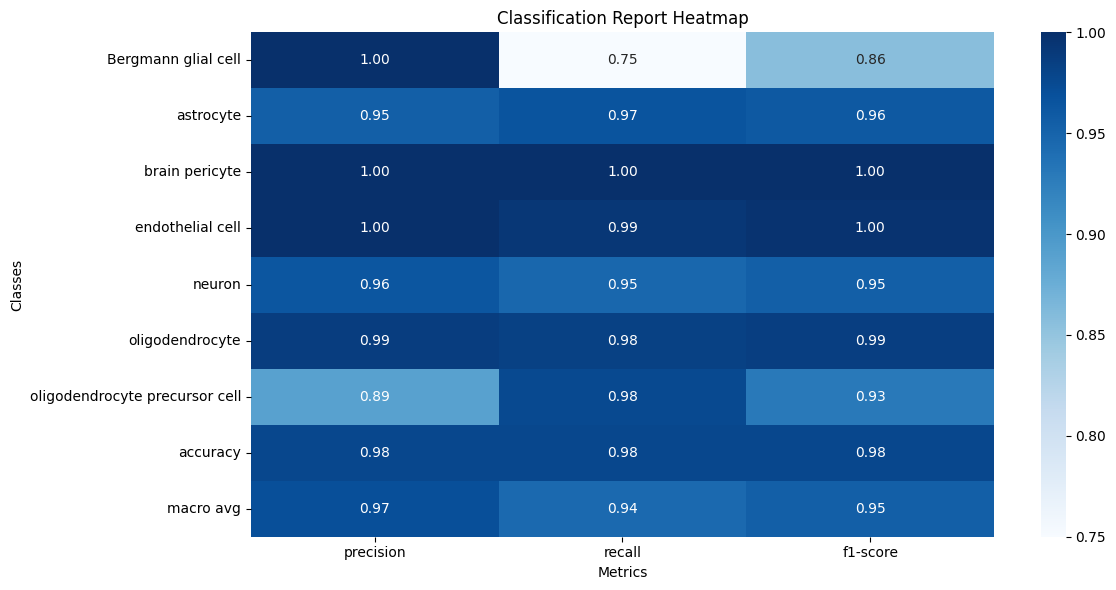

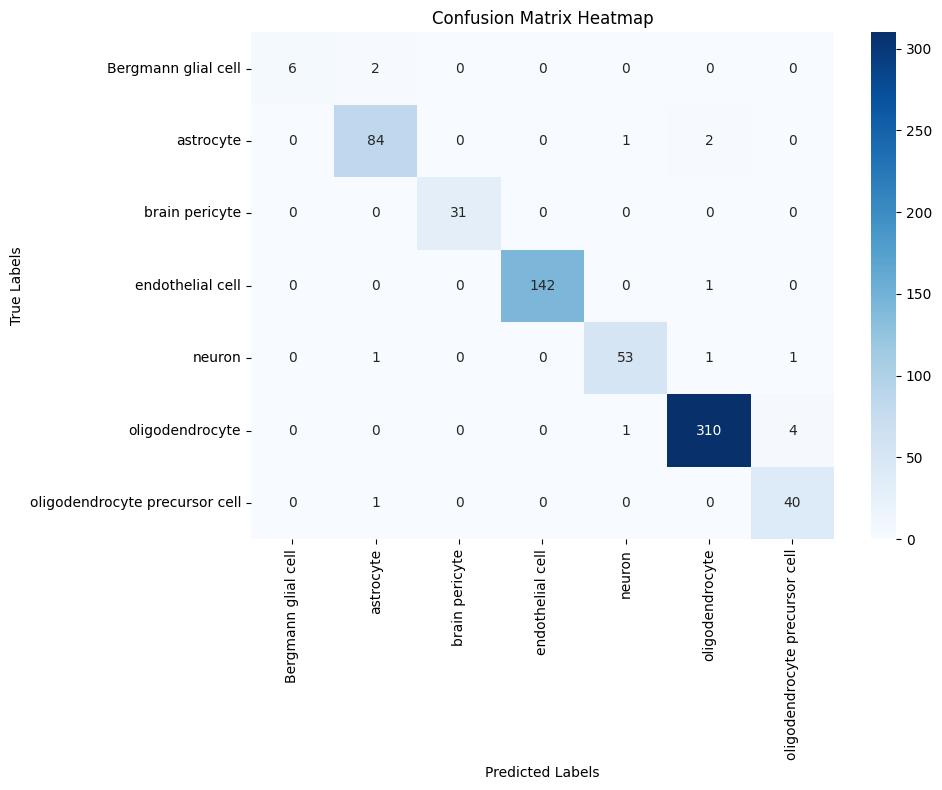

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# true and predicted labels
true_labels = test.obs['cell_ontology_class']  # Ground truth
predicted_labels = predictions.predicted_labels.predicted_labels  # Predicted labels

#to lists if necessary
true_labels_list = true_labels.tolist()
predicted_labels_list = predicted_labels.tolist()
###################
#classification report
report = classification_report(true_labels_list, predicted_labels_list, output_dict=True)
report_df = pd.DataFrame(report).transpose()

#Confusion Matrix
conf_matrix = confusion_matrix(true_labels_list, predicted_labels_list)
unique_labels = sorted(set(true_labels_list))

#accuracy and F1
accuracy = accuracy_score(true_labels_list, predicted_labels_list)
f1 = f1_score(true_labels_list, predicted_labels_list, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (Weighted): {f1:.2f}")

#cm
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


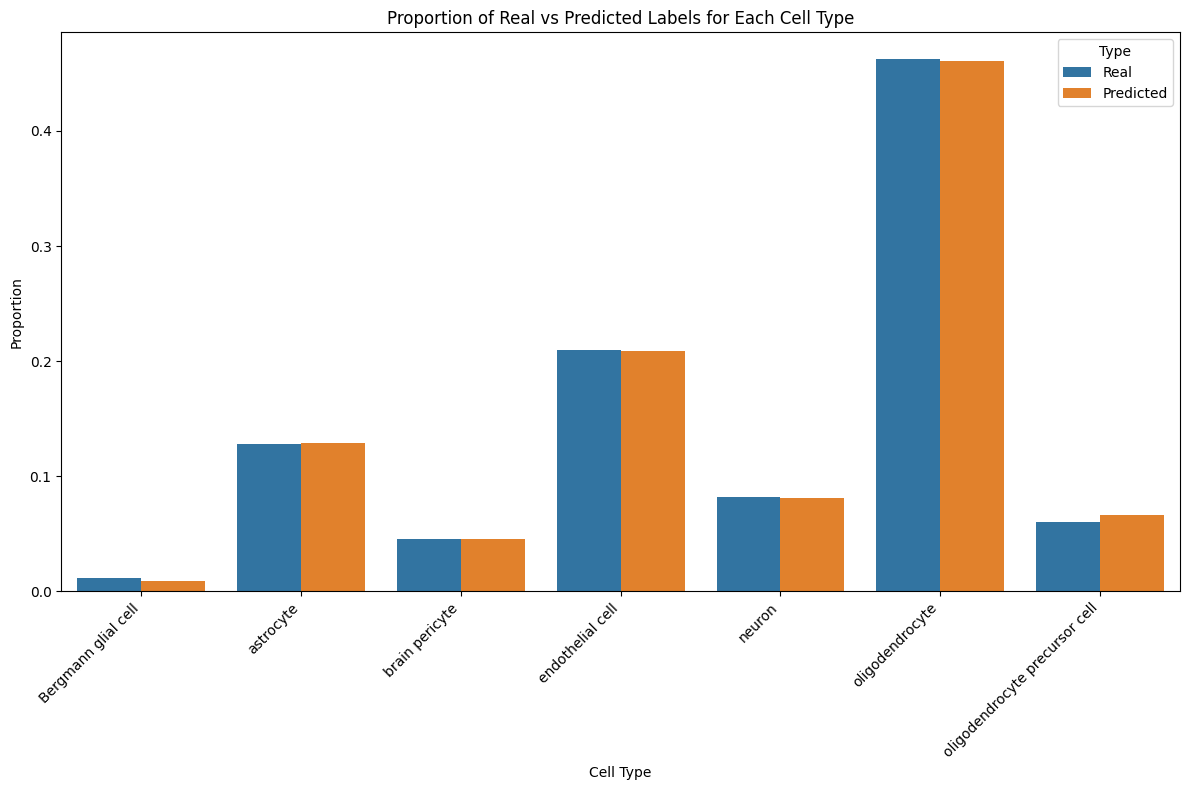

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#frequency of each label in true and predicted lists
true_counts = pd.Series(true_labels_list).value_counts(normalize=True).sort_index()
predicted_counts = pd.Series(predicted_labels_list).value_counts(normalize=True).sort_index()

#true and predicted counts into a DataFrame
proportion_df = pd.DataFrame({
    'Cell Type': true_counts.index.union(predicted_counts.index),  #############
    ######
    'Real': true_counts.reindex(true_counts.index.union(predicted_counts.index), fill_value=0),
    'Predicted': predicted_counts.reindex(true_counts.index.union(predicted_counts.index), fill_value=0)
}).melt(id_vars=['Cell Type'], var_name='Type', value_name='Proportion')

#bar plot side by side
plt.figure(figsize=(12, 8))
sns.barplot(data=proportion_df, x='Cell Type', y='Proportion', hue='Type', errorbar=None)

#
plt.xticks(rotation=45, ha='right')
plt.title("Proportion of Real vs Predicted Labels for Each Cell Type")
plt.xlabel("Cell Type")
plt.ylabel("Proportion")
plt.legend(title="Type", loc='upper right')
plt.tight_layout()
plt.show()
